<a href="https://colab.research.google.com/github/ThaliSouza2017/beam/blob/master/Desafio_Previs%C3%A3o_Produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise sobre variáveis que influenciam no interesse por um produto



O objetivo dessa análise é interpretar um conjunto de dados e descobrir possíveis variáveis que são mais importantes e que tem maior probabilidade de fazer com que um determinado produto seja interessante ou não aos olhos dos clientes.


### Conteúdo:


1) Análise Exploratória

2) Data Prep

3) Algoritmos

4) Conclusão


---



### 1) Análise Exploratória


* Subindo o Dataset
* Verificando o tipo e a consistência dos dados
* Analisando dados faltantes, outliers e outros possíveis problemas
* Plotando e entendendo a distribuição desses dados

In [0]:
# importando as bibliotecas

# processamento e manipulação dos dados
import numpy as np 
import pandas as pd 

# visualização
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [180]:
# fazendo o upload do dataset 
from google.colab import files
uploaded = files.upload()

Saving problem1_dataset (1).csv to problem1_dataset (1) (1).csv


In [0]:
# criando o dataframe a partir do arquivo em csv
data = pd.read_csv('problem1_dataset (1) (1).csv')

In [184]:
# lendo as primeiras linhas do dataset para ver se deu tudo certo
data.head(10)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.990000,0.0
1,238630912,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,150.0,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.112581,0.0
2,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.990000,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.293333,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.330242,0.0
5,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,914.936724,179.990000,0.0
6,254633548,30.5,NaN,ALUMINIO,AMARELO,REDONDO,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,793.755940,199.990000,0.0
7,788804,NaN,0.1,INOX,INOX,NaN,NaN,TRAMONTINA,No,no,NaN,NaN,NaN,NAO,NAO,0.0,CREMEIRA,NAO,473.772238,64.840000,0.0
8,245842578,27.0,NaN,ALUMINIO,LARANJA,FRIGIDEIRA,45.5,EURO,No,no,86.0,59.5,3.0,NAO,NAO,1.0,WOK,SIM,NaN,115.518696,0.0
9,227368822,42.7,4.5,ALUMINIO,CEREJA,REDONDO,32.7,TRAMONTINA,Yes,no,160.0,18.1,12.0,NAO,NAO,0.0,PANELA,SIM,14.583125,89.900000,1.0


In [185]:
# conferindo os tipos de dados que estão presentes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180275 entries, 0 to 180274
Data columns (total 21 columns):
ITEM_ID              180275 non-null int64
ALTURA               171007 non-null float64
CAPACIDADE_(L)       76671 non-null float64
COMPOSICAO           156978 non-null object
COR                  170251 non-null object
FORMATO              90011 non-null object
LARGURA              171007 non-null float64
MARCA                180001 non-null object
PARA_LAVA_LOUCAS     104086 non-null object
PARA_MICRO_ONDAS     86402 non-null object
PESO                 98524 non-null float64
PROFUNDIDADE         171007 non-null float64
TEMPO_GARANTIA       122770 non-null float64
TEM_FERRO_FUNDIDO    180275 non-null object
TEM_GRELHA           180275 non-null object
TEM_TAMPA            180275 non-null float64
TIPO_PRODUTO         180275 non-null object
TIPO_WOK             180275 non-null object
SESSION_ID           178273 non-null float64
ITEM_PRICE           167178 non-null float64
INTER

In [186]:
# exibindo alguns dados de estatística descritiva básica
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ITEM_ID,180275.0,2.156229e+08,1.030257e+08,293916.000000,2.273688e+08,2.485863e+08,2.567376e+08,2.711264e+10
ALTURA,171007.0,3.057564e+01,1.485640e+01,2.000000,1.900000e+01,3.050000e+01,4.270000e+01,8.400000e+01
CAPACIDADE_(L),76671.0,4.234668e+00,1.699274e+00,0.045000,3.100000e+00,4.500000e+00,6.000000e+00,1.100000e+01
LARGURA,171007.0,2.788216e+01,1.049494e+01,4.500000,2.000000e+01,2.780000e+01,3.500000e+01,9.100000e+01
PESO,98524.0,3.112591e+02,1.727586e+03,0.619000,1.200000e+02,1.600000e+02,1.900000e+02,4.440000e+04
PROFUNDIDADE,171007.0,3.479739e+01,1.517991e+01,2.500000,1.980000e+01,3.850000e+01,4.700000e+01,1.480000e+02
TEMPO_GARANTIA,122770.0,1.387074e+01,4.364158e+01,1.000000,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+02
TEM_TAMPA,180275.0,4.407045e-01,4.964730e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
SESSION_ID,178273.0,4.997572e+02,2.888417e+02,1.011194,2.493438e+02,5.007592e+02,7.492047e+02,1.000985e+03
ITEM_PRICE,167178.0,1.278310e+02,1.372982e+02,0.550000,7.499000e+01,1.044824e+02,1.463277e+02,2.274990e+03


In [216]:
# identificando alguns outliers em min e max dessas variáveis
data['ITEM_PRICE'].describe()

count    167178.000000
mean        127.831019
std         137.298241
min           0.550000
25%          74.990000
50%         104.482418
75%         146.327727
max        2274.990000
Name: ITEM_PRICE, dtype: float64

In [188]:
# exibindo o agrupamento de variáveis por tipo de interesse, sendo 0 = não e 1 = sim
data.groupby('INTERESTED').count()

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE
INTERESTED,,,,,,,,,,,,,,,,,,,,
0.0,164748,156160,69772,143046,155613,82402,156160,164501,95164,79278,89947,156160,112182,164748,164748,164748,164748,164748,163273,151651
1.0,15527,14847,6899,13932,14638,7609,14847,15500,8922,7124,8577,14847,10588,15527,15527,15527,15527,15527,15000,15527


In [189]:
# exibindo a correlação ainda sem o tratamento das variáveis
data.corr()

,ITEM_ID,ALTURA,CAPACIDADE_(L),LARGURA,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_TAMPA,SESSION_ID,ITEM_PRICE,INTERESTED
ITEM_ID,1.000000,0.086501,0.284518,0.000875,-0.072649,0.158861,-0.289174,0.139191,-0.002738,0.037529,0.018826
ALTURA,0.086501,1.000000,0.549594,0.512616,-0.034855,0.076210,0.008726,0.080455,-0.005257,0.101035,0.013090
CAPACIDADE_(L),0.284518,0.549594,1.000000,0.499901,-0.181202,0.279373,-0.120299,0.427620,0.004321,0.276536,0.006211
LARGURA,0.000875,0.512616,0.499901,1.000000,0.003154,0.143390,0.096752,-0.008692,-0.002564,0.187375,-0.013585
PESO,-0.072649,-0.034855,-0.181202,0.003154,1.000000,-0.030346,-0.003684,0.006388,-0.004057,0.181654,-0.009786
PROFUNDIDADE,0.158861,0.076210,0.279373,0.143390,-0.030346,1.000000,-0.104709,0.311020,-0.001560,0.308069,-0.008567
TEMPO_GARANTIA,-0.289174,0.008726,-0.120299,0.096752,-0.003684,-0.104709,1.000000,-0.152444,-0.001797,0.054621,-0.001440
TEM_TAMPA,0.139191,0.080455,0.427620,-0.008692,0.006388,0.311020,-0.152444,1.000000,0.003780,0.044499,0.020278
SESSION_ID,-0.002738,-0.005257,0.004321,-0.002564,-0.004057,-0.001560,-0.001797,0.003780,1.000000,-0.004507,0.000328
ITEM_PRICE,0.037529,0.101035,0.276536,0.187375,0.181654,0.308069,0.054621,0.044499,-0.004507,1.000000,-0.027772


In [190]:
# checando os dados faltantes
data.isnull().sum()

ITEM_ID                   0
ALTURA                 9268
CAPACIDADE_(L)       103604
COMPOSICAO            23297
COR                   10024
FORMATO               90264
LARGURA                9268
MARCA                   274
PARA_LAVA_LOUCAS      76189
PARA_MICRO_ONDAS      93873
PESO                  81751
PROFUNDIDADE           9268
TEMPO_GARANTIA        57505
TEM_FERRO_FUNDIDO         0
TEM_GRELHA                0
TEM_TAMPA                 0
TIPO_PRODUTO              0
TIPO_WOK                  0
SESSION_ID             2002
ITEM_PRICE            13097
INTERESTED                0
dtype: int64

In [191]:
# exibindo o percentual de dados faltantes por variável
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()


,Total,%
CAPACIDADE_(L),103604,57.5
PARA_MICRO_ONDAS,93873,52.1
FORMATO,90264,50.1
PESO,81751,45.3
PARA_LAVA_LOUCAS,76189,42.3
TEMPO_GARANTIA,57505,31.9
COMPOSICAO,23297,12.9
ITEM_PRICE,13097,7.3
COR,10024,5.6
LARGURA,9268,5.1


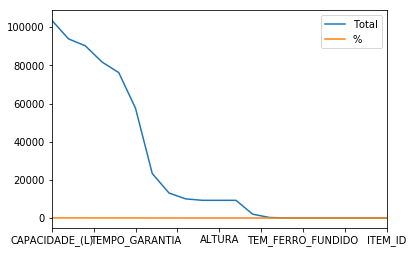

In [192]:
#plotando os dados faltantes
missing_data.plot()
plt.show()

<function matplotlib.pyplot.show>

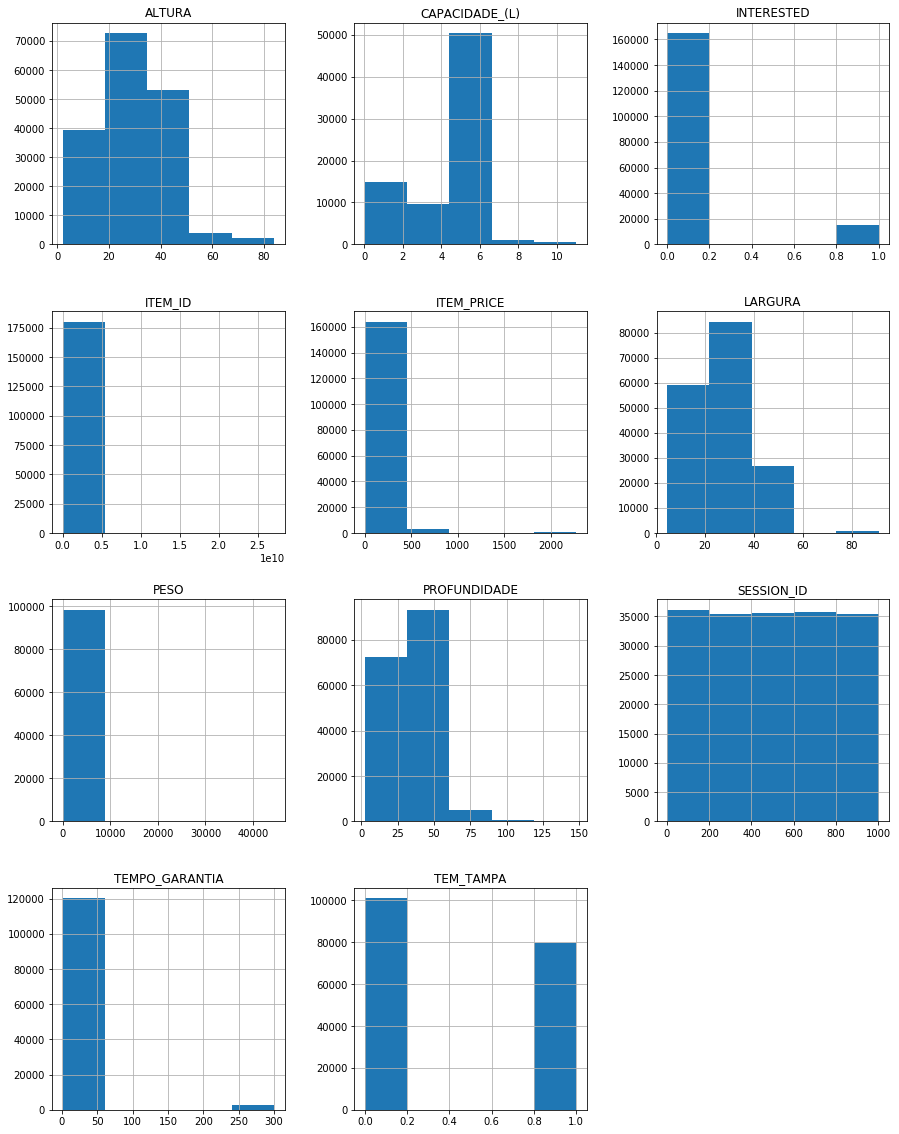

In [365]:
#agora, vou plotar histogramas para verificar a distribuicao dos dados 
data.hist(bins = 5, figsize= (15,20))
plt.show

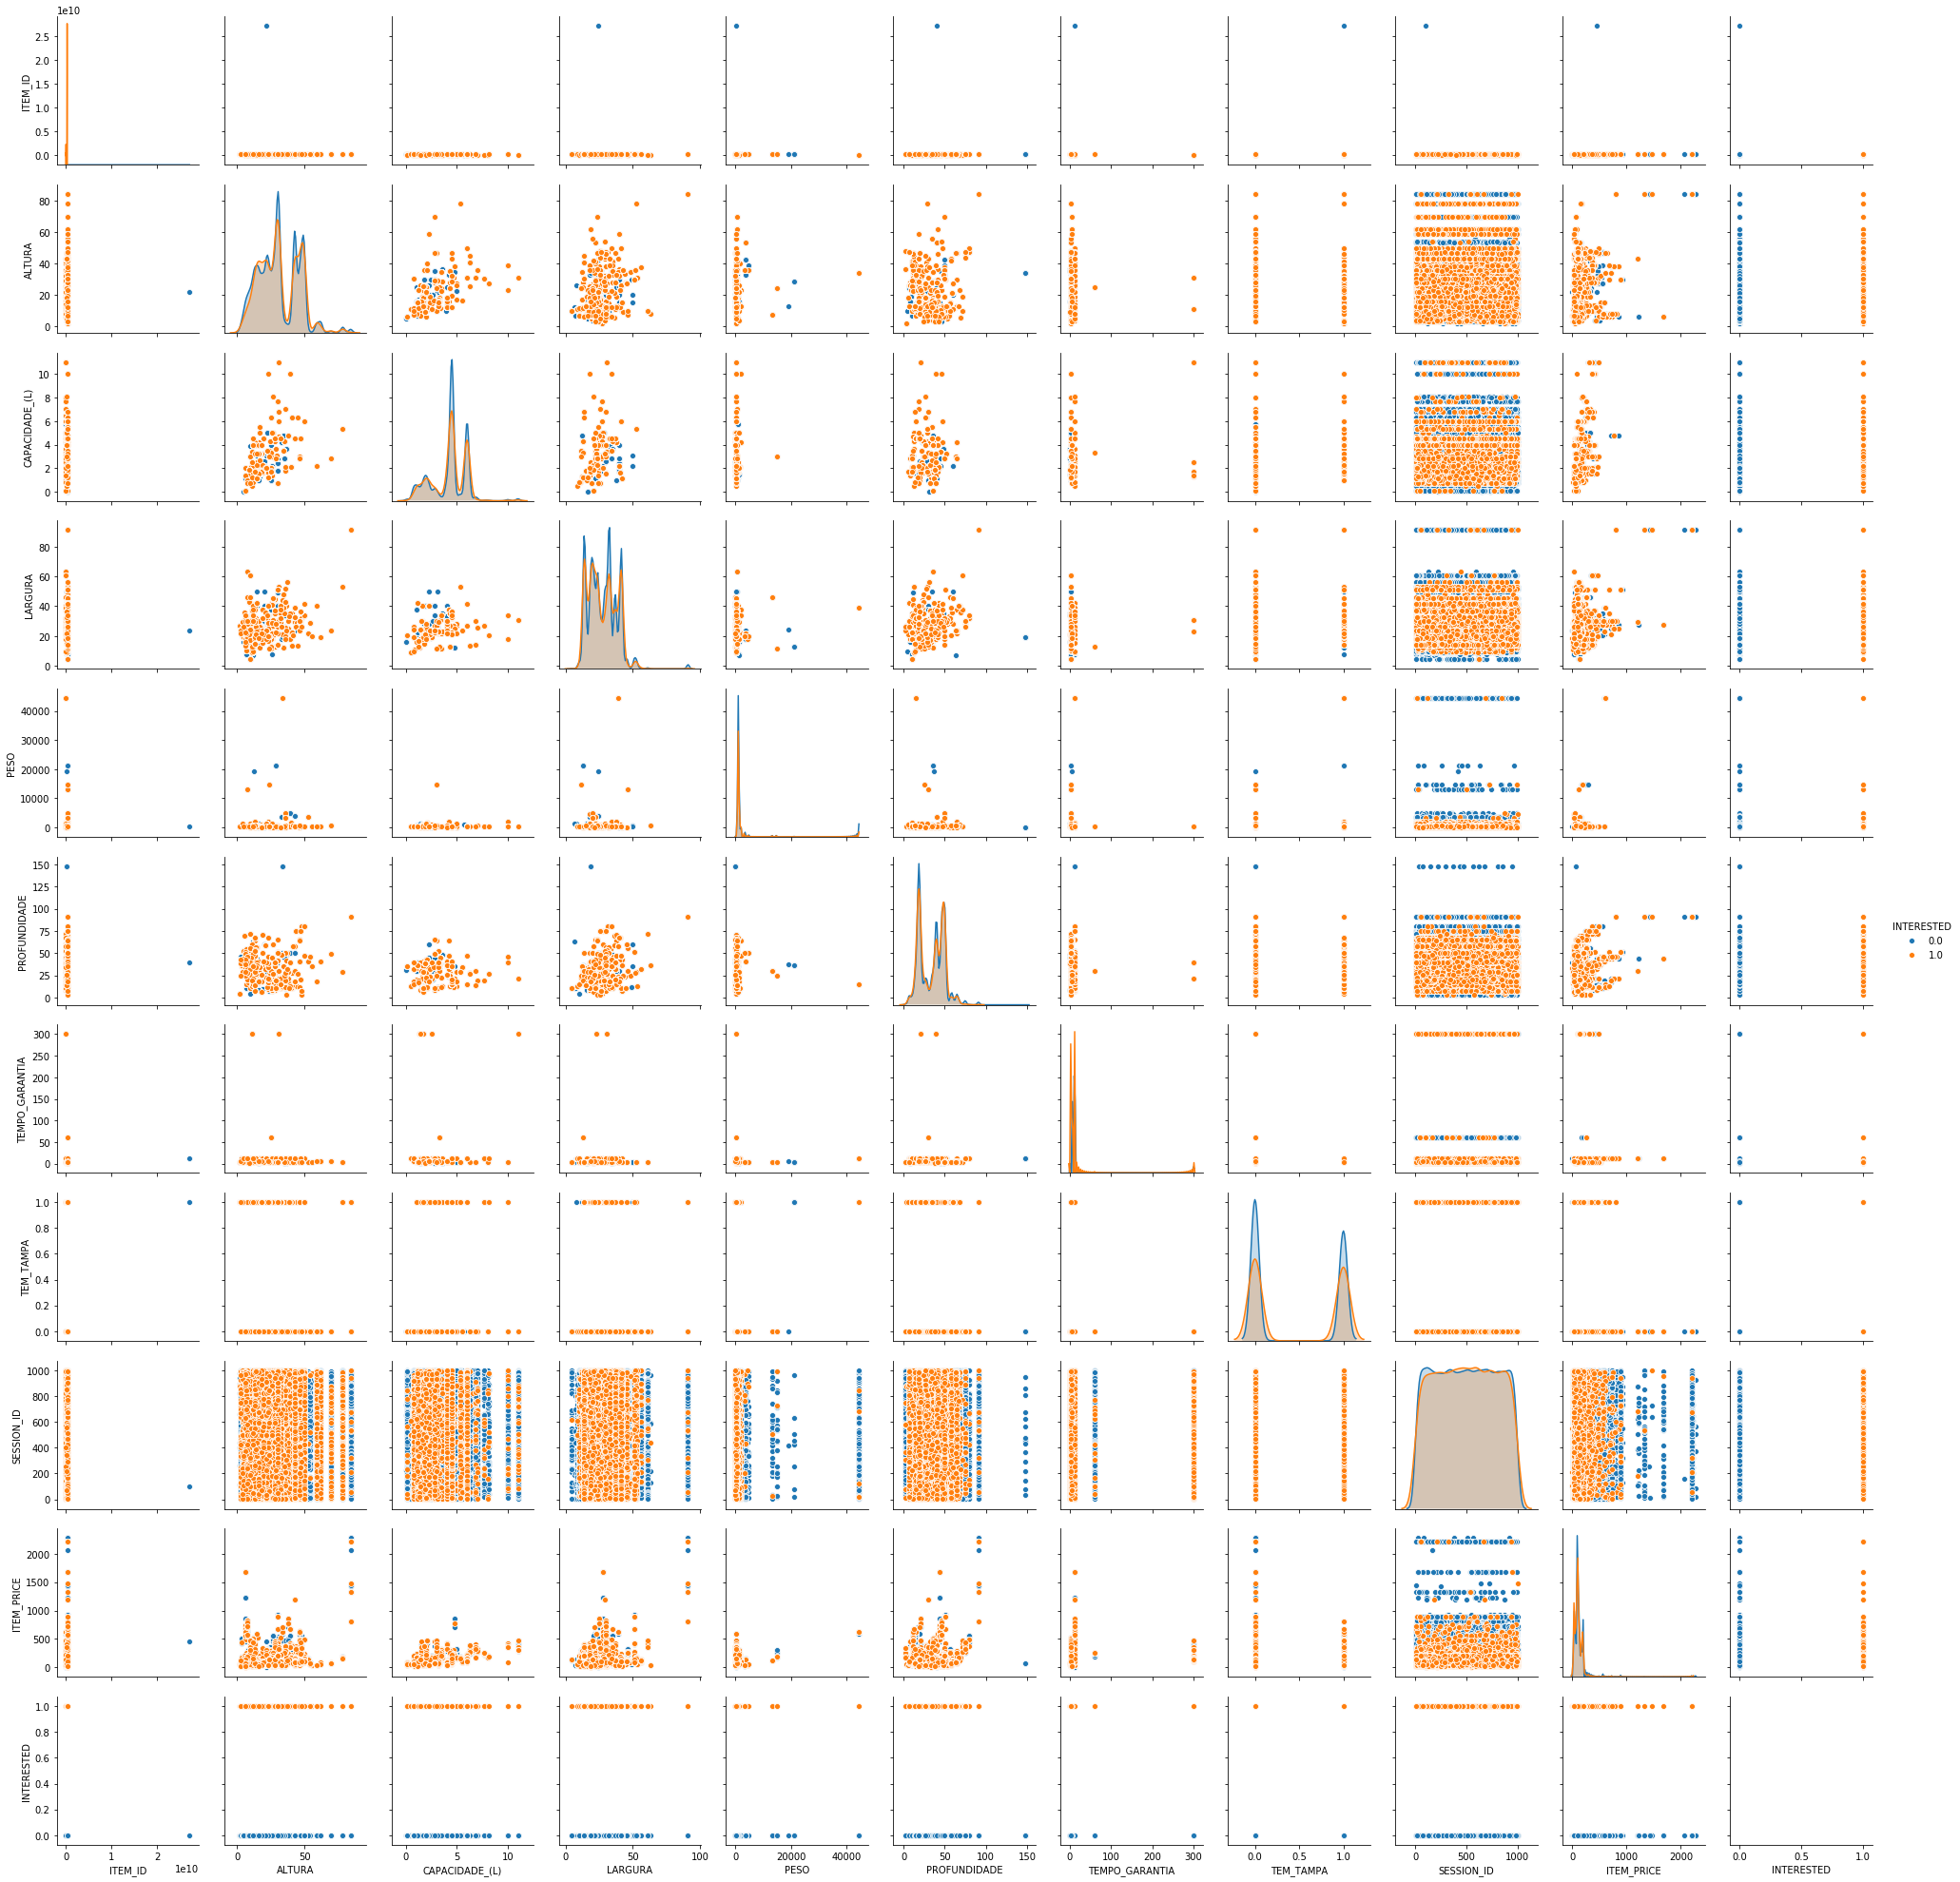

In [194]:
# verificando se há alguma correlação identificável logo de cara
sns.pairplot(data, hue = 'INTERESTED')

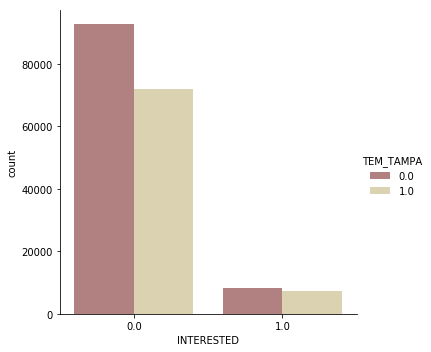

In [196]:
# plotando a variável 'INTERESTED' por variável 'TEM_TAMPA'
sns.catplot(x='INTERESTED', kind='count', hue = 'TEM_TAMPA', palette = 'pink', data=data)

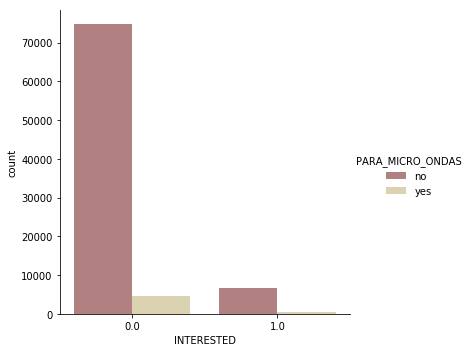

In [197]:
# plotando a variável 'INTERESTED' por variável 'PARA_MICRO_ONDAS'
sns.catplot(x='INTERESTED', kind='count', hue = 'PARA_MICRO_ONDAS', palette = 'pink', data=data)

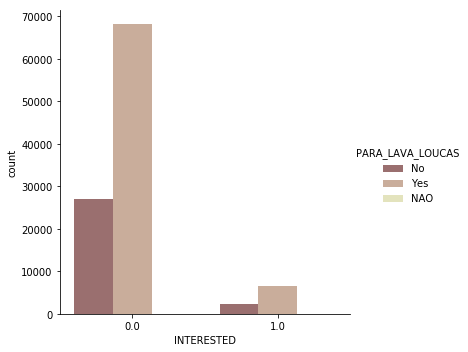

In [198]:
# plotando a variável 'INTERESTED' por variável 'PARA_LAVA_LOUCAS'
sns.catplot(x='INTERESTED', kind='count', hue = 'PARA_LAVA_LOUCAS', palette = 'pink', data=data)

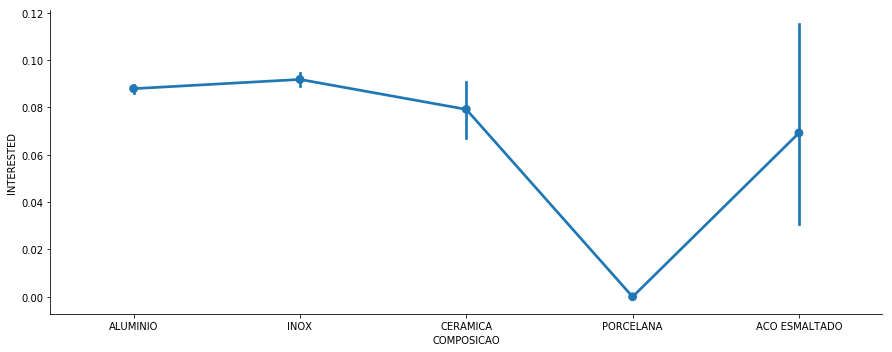

In [200]:
# plotando a variável 'INTERESTED' pela variável 'COMPOSICAO'
axes = sns.factorplot('COMPOSICAO','INTERESTED', 
                      data=data, aspect = 2.5, )

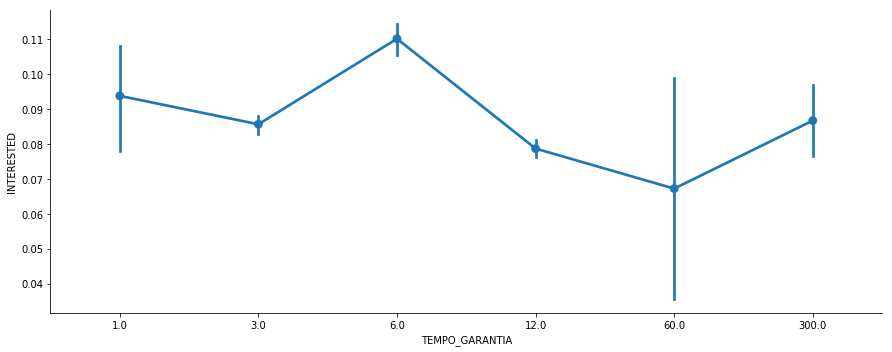

In [201]:
# plotando a variável 'INTERESTED' pela variável 'TEMPO_GARANTIA'
axes = sns.factorplot('TEMPO_GARANTIA','INTERESTED', 
                      data=data, aspect = 2.5, )

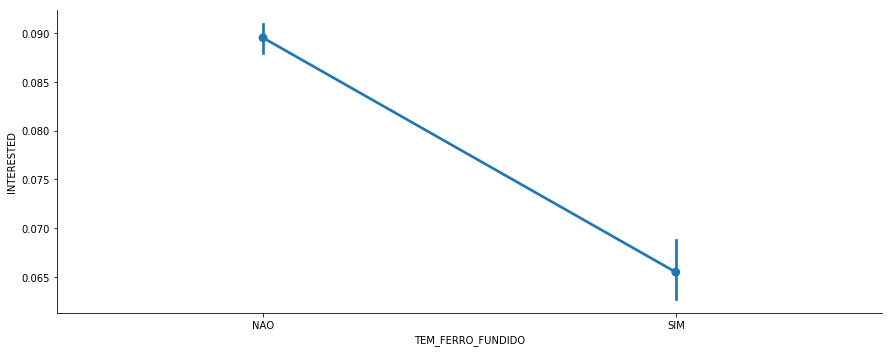

In [202]:
# plotando a variável 'INTERESTED' pela variável 'TEM_FERRO_FUNDIDO'
axes = sns.factorplot('TEM_FERRO_FUNDIDO','INTERESTED', 
                      data=data, aspect = 2.5, )

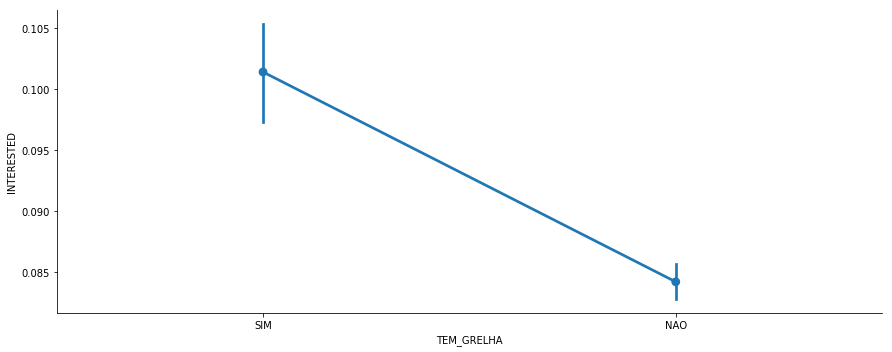

In [203]:
# plotando a variável 'INTERESTED' pela variável 'TEM_FERRO_FUNDIDO'
axes = sns.factorplot('TEM_GRELHA','INTERESTED', 
                      data=data, aspect = 2.5, )

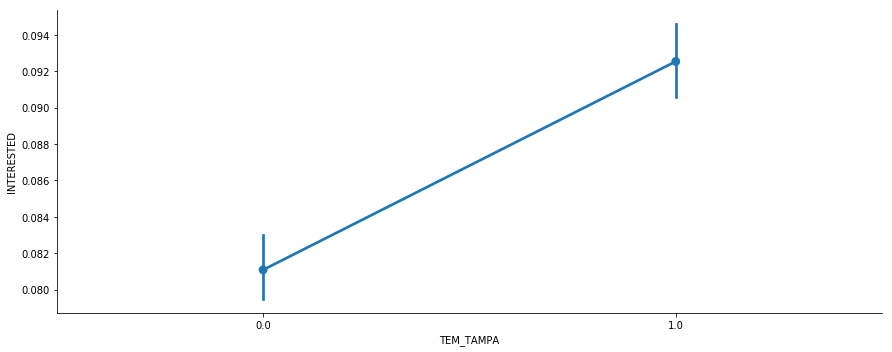

In [204]:
# plotando a variável 'INTERESTED' pela variável 'TEM_TAMPA'
axes = sns.factorplot('TEM_TAMPA','INTERESTED', 
                      data=data, aspect = 2.5, )

### 2) Data Prep


* Limpeza dos dados
* Resolvendo problemas de dados faltantes nas variáveis categóricas e quantitativas
* Tratando outliers
* Transformando dados
* Escolhendo variáveis que serão utilizadas na predição

In [269]:
# exibindo o dataset
data.head(0)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED


In [0]:
#excluindo colunas que não são importantes para a regressão ou que são dependentes entre si ou que tem uma alta taxa de missing data

data1 = data.drop(['ITEM_ID', 'CAPACIDADE_(L)', 'FORMATO', 'LARGURA', 'PARA_LAVA_LOUCAS', 'PARA_MICRO_ONDAS', 'PESO', 'PROFUNDIDADE', 'TEM_FERRO_FUNDIDO', 'TEM_GRELHA', 'TEM_TAMPA', 'TIPO_WOK', 'SESSION_ID'], axis=1)

In [271]:
#exibindo o novo data_set
data1.head()

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED
0,30.5,ALUMINIO,VINHO,LA CUISINE,3.0,PANELA,199.990000,0.0
1,22.0,ALUMINIO,COLORIDO,TRAMONTINA,12.0,PIPOQUEIRA,105.112581,0.0
2,24.0,INOX,INOX,LA CUISINE,3.0,ESPAGUETEIRA,139.990000,0.0
3,49.5,ALUMINIO,VERMELHO,TRAMONTINA,NaN,PIPOQUEIRA,103.293333,1.0
4,49.5,ALUMINIO,VERMELHO,TRAMONTINA,NaN,PIPOQUEIRA,103.330242,0.0


In [272]:
#descrevendo o novo dataset
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ALTURA,171007.0,30.575636,14.856403,2.00,19.00,30.500000,42.700000,84.00
TEMPO_GARANTIA,122770.0,13.870742,43.641581,1.00,3.00,6.000000,12.000000,300.00
ITEM_PRICE,167178.0,127.831019,137.298241,0.55,74.99,104.482418,146.327727,2274.99
INTERESTED,180275.0,0.086130,0.280556,0.00,0.00,0.000000,0.000000,1.00


In [0]:
# criando a tabela com variável que quero prever (y)
y = data1.INTERESTED
# criando a tabela com as features que irão compor a previsão (X)
features = ['ALTURA', 'COMPOSICAO', 'COR', 'MARCA', 'TEMPO_GARANTIA', 'TIPO_PRODUTO', 'ITEM_PRICE']
X = data1[features]

<function matplotlib.pyplot.show>

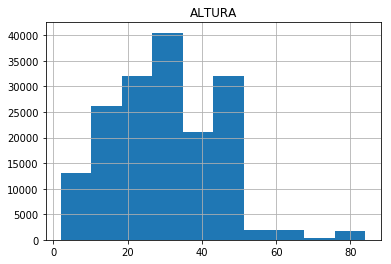

In [274]:
#plotando a distribuição da variável ALTURA
data1.hist('ALTURA')
plt.show

In [0]:
#corrigindo os dados faltantes na variável Altura
df = [X, data1]

for dataset in df:
    mean = dataset["ALTURA"].mean()
    std = dataset["ALTURA"].std()
    is_null = dataset["ALTURA"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_altura = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    altura_slice = dataset["ALTURA"].copy()
    altura_slice[np.isnan(altura_slice)] = rand_altura
    dataset["ALTURA"] = altura_slice
    dataset["ALTURA"] = X["ALTURA"].astype(int)

<function matplotlib.pyplot.show>

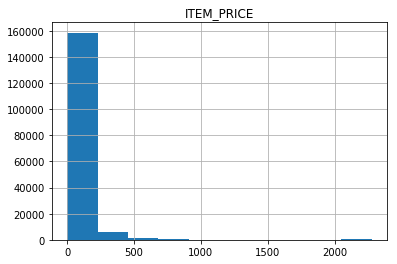

In [277]:
#plotando a distribuição da variável ITEM_PRICE
data1.hist('ITEM_PRICE')
plt.show

In [278]:
#excluindo outliers da variável ITEM_PRICE
price_data = data1.query('ITEM_PRICE<1000')
price_data.head()
price_data.describe()


,ALTURA,TEMPO_GARANTIA,ITEM_PRICE,INTERESTED
count,166724.000000,115899.000000,166724.000000,166724.000000
mean,30.635050,14.115609,122.620003,0.093070
std,14.181433,44.253976,92.758054,0.290531
min,2.000000,1.000000,0.550000,0.000000
25%,19.000000,3.000000,74.990000,0.000000
50%,30.000000,6.000000,104.275714,0.000000
75%,42.000000,12.000000,144.990000,0.000000
max,84.000000,300.000000,919.990000,1.000000


In [279]:
# exibindo o dataset alterado
data1 = price_data
data1.describe()

,ALTURA,TEMPO_GARANTIA,ITEM_PRICE,INTERESTED
count,166724.000000,115899.000000,166724.000000,166724.000000
mean,30.635050,14.115609,122.620003,0.093070
std,14.181433,44.253976,92.758054,0.290531
min,2.000000,1.000000,0.550000,0.000000
25%,19.000000,3.000000,74.990000,0.000000
50%,30.000000,6.000000,104.275714,0.000000
75%,42.000000,12.000000,144.990000,0.000000
max,84.000000,300.000000,919.990000,1.000000


In [0]:
# corrigindo os dados faltantes na variável Preço
# como essa variável é mais irregular do que a Altura, vou utilizar a mediana para preencher os dados faltantes

df2 = [X, data1]

for dataset in df:
    median = X["ITEM_PRICE"].median()
    is_null = dataset["ITEM_PRICE"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_price = (median == is_null)
    # fill NaN values in Age column with random values generated
    price_slice = dataset["ITEM_PRICE"].copy()
    price_slice[np.isnan(price_slice)] = rand_price
    dataset["ITEM_PRICE"] = price_slice
    dataset["ITEM_PRICE"] = X["ITEM_PRICE"].astype(int)

<function matplotlib.pyplot.show>

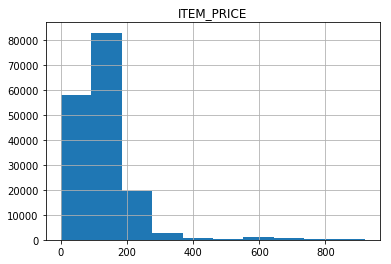

In [282]:
#exibindo novo dataset com correção da variável ITEM_PRICE
data1.hist('ITEM_PRICE')
plt.show

<function matplotlib.pyplot.show>

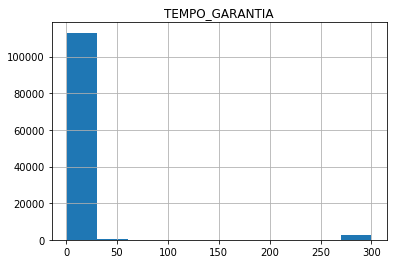

In [283]:
#Agora vou fazer o mesmo processo com a variável TEMPO_GARANTIA
data1.hist('TEMPO_GARANTIA')
plt.show

In [0]:
#excluindo outliers
g_data = data1.query('TEMPO_GARANTIA<60')
g_data.head()
g_data.describe()
data1 = g_data

<function matplotlib.pyplot.show>

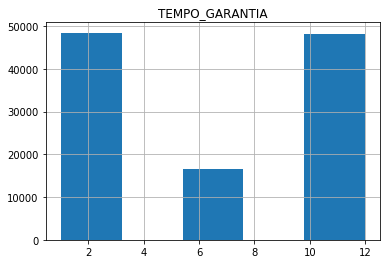

In [285]:
#plotando o histograma da variável
data1.hist('TEMPO_GARANTIA', bins=5)
plt.show

In [286]:
#descrevendo a composição da variável
data1['TEMPO_GARANTIA'].describe()

count    113011.000000
mean          7.247303
std           4.219357
min           1.000000
25%           3.000000
50%           6.000000
75%          12.000000
max          12.000000
Name: TEMPO_GARANTIA, dtype: float64

In [0]:
# corrigindo os dados faltantes na variável Tempo de Garantia
# como essa variável é mais irregular do que a Altura, vou utilizar a mediana para preencher os dados faltantes, pois é uma representação mais acurada dos dados

df3 = [X, data1]

for dataset in df:
    is_null = dataset["TEMPO_GARANTIA"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_garantia = np.random.randint(1,13, size = is_null)
    # fill NaN values in Age column with random values generated
    garantia_slice = dataset["TEMPO_GARANTIA"].copy()
    garantia_slice[np.isnan(garantia_slice)] = rand_garantia
    dataset["TEMPO_GARANTIA"] = garantia_slice
    dataset["TEMPO_GARANTIA"] = X["TEMPO_GARANTIA"].astype(int)

<function matplotlib.pyplot.show>

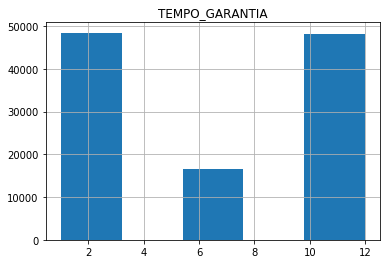

In [288]:
# conferindo se a nova distribuição está parecida com a distribuição original
data1.hist('TEMPO_GARANTIA', bins=5)
plt.show

In [289]:
#checando quais variáveis ainda estão com dados faltantes
data1.isnull().sum()

ALTURA               0
COMPOSICAO        2658
COR               5310
MARCA                0
TEMPO_GARANTIA       0
TIPO_PRODUTO         0
ITEM_PRICE           0
INTERESTED           0
dtype: int64

In [292]:
# agora vou tratar os dados faltantes das variáveis categóricas
# no caso da variável Marca, cujos valores faltantes representam menos de 2% do dataset, vou apenas substituir pelo valor mais frequente

data1['MARCA'].describe()

count         113011
unique            26
top       TRAMONTINA
freq           43667
Name: MARCA, dtype: object

In [0]:
#substituindo pela Marca mais frequente do dataset
common_brand = 'TRAMONTINA'
data_brand = [X, data1]

for dataset in data_brand:
    dataset['MARCA'] = dataset['MARCA'].fillna(common_brand)

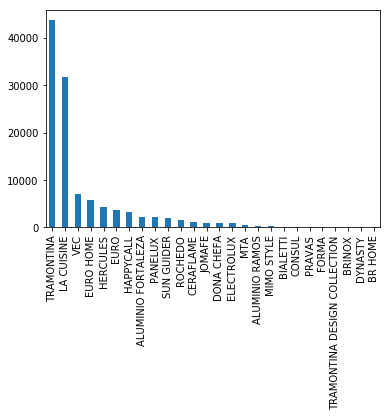

In [294]:
#checando como ficaram os dados após a distribuição
data1['MARCA'].value_counts().plot.bar()


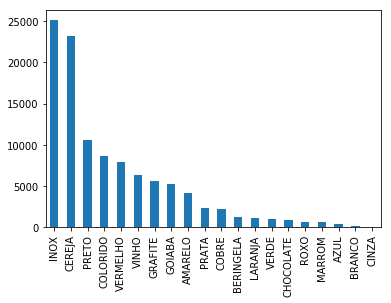

In [295]:
# continuando a tratar os dados faltantes das variáveis categóricas
# variável COR

data1['COR'].value_counts().plot.bar()


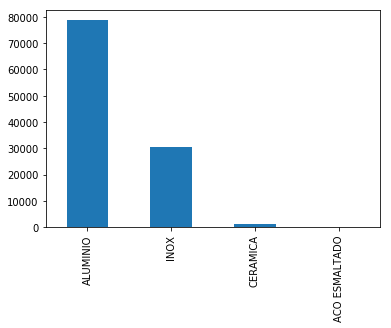

In [296]:
# variável COMPOSICAO
data1['COMPOSICAO'].value_counts().plot.bar()

In [0]:
# as variáveis COR e COMPOSICAO são mais complicadas pois possuem uma parcela maior de dados faltantes
# por isso, decidi substituir por outras categorias, apenas para eliminar os valores null sem comprometer a integridade do dataset

data = [X, data1]

for dataset in data:
    dataset['COR'] = dataset['COR'].fillna("COLOR_0")
    dataset['COMPOSICAO'] = dataset['COMPOSICAO'].fillna("COMP_0")


In [298]:
#checando se ambos os datasets estão sem valores faltantes
X.isnull().sum()

ALTURA            0
COMPOSICAO        0
COR               0
MARCA             0
TEMPO_GARANTIA    0
TIPO_PRODUTO      0
ITEM_PRICE        0
dtype: int64

In [299]:
data1.isnull().sum()

ALTURA            0
COMPOSICAO        0
COR               0
MARCA             0
TEMPO_GARANTIA    0
TIPO_PRODUTO      0
ITEM_PRICE        0
INTERESTED        0
dtype: int64

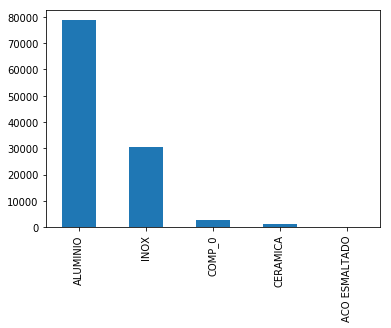

In [300]:
#verificando se as novas variáveis estão presentes no dataset
data1['COMPOSICAO'].value_counts().plot.bar()

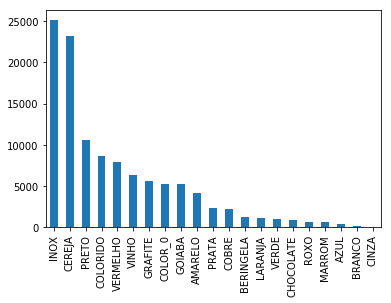

In [301]:
data1['COR'].value_counts().plot.bar()

### 3) Algoritmos


* Aplicando Standardização dos dados
* Normalizando as variáveis
* Separando o dataset nas bases de treino e teste
* Aplicando algoritmos e medindo a acurácia
* Validando a performance dos resultados

In [0]:
#no caso das variáveis categóricas, vou aplicar LabelEncoder para transformá-las em números

df4 = data1

#composição
le = LabelEncoder()
le.fit(df4.COMPOSICAO.drop_duplicates()) 
df4.COMPOSICAO = le.transform(df4.COMPOSICAO)

#cor
le.fit(df4.COR.drop_duplicates()) 
df4.COR = le.transform(df4.COR)

#marca
le.fit(df4.MARCA.drop_duplicates()) 
df4.MARCA = le.transform(df4.MARCA)

#tipo_produto
le.fit(df4.TIPO_PRODUTO.drop_duplicates()) 
df4.TIPO_PRODUTO = le.transform(df4.TIPO_PRODUTO)

In [305]:
#exibindo o novo dataset com algumas variáveis standardizadas
df4.head()

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED
0,30,1,20,16,3.0,15,199.990000,0.0
1,22,1,8,23,12.0,17,105.112581,0.0
2,24,4,12,16,3.0,9,139.990000,0.0
5,30,1,20,16,3.0,15,179.990000,0.0
6,30,1,0,16,3.0,15,199.990000,0.0


In [0]:
# a variável preço é uma variável númerica com muitos valores únicos, por isso, faz mais sentido agrupar esses dados em faixas de dados (ou quartis)
# separando a variável preço em 4 faixas de valores
pd.qcut(df4['ITEM_PRICE'], q=4)


In [313]:
# criando duas novas colunas para armazenar quartis e décimos da mesma variável preço
df4['quantile_ex_1'] = pd.qcut(df4['ITEM_PRICE'], q=4)
df4['quantile_ex_2'] = pd.qcut(df4['ITEM_PRICE'], q=10, precision=0)

df4.head()

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED,quantile_ex_1,quantile_ex_2
0,30,1,20,16,3.0,15,199.990000,0.0,"(169.99, 861.5]","(185.0, 200.0]"
1,22,1,8,23,12.0,17,105.112581,0.0,"(101.908, 169.99]","(102.0, 126.0]"
2,24,4,12,16,3.0,9,139.990000,0.0,"(101.908, 169.99]","(126.0, 143.0]"
5,30,1,20,16,3.0,15,179.990000,0.0,"(169.99, 861.5]","(143.0, 185.0]"
6,30,1,0,16,3.0,15,199.990000,0.0,"(169.99, 861.5]","(185.0, 200.0]"


In [314]:
#verificando a distribuição dos valores em quartis
df4['quantile_ex_1'].value_counts()

(84.838, 101.908]    28282
(0.549, 84.838]      28282
(101.908, 169.99]    28264
(169.99, 861.5]      28183
Name: quantile_ex_1, dtype: int64

In [315]:
#verificando a distribuição dos valores em décimos
df4['quantile_ex_2'].value_counts()

(185.0, 200.0]    13898
(67.0, 90.0]      12822
(0.0, 36.0]       11636
(143.0, 185.0]    11357
(96.0, 102.0]     11355
(102.0, 126.0]    11307
(126.0, 143.0]    11261
(36.0, 67.0]      10970
(90.0, 96.0]       9781
(200.0, 862.0]     8624
Name: quantile_ex_2, dtype: int64

In [318]:
#agora, vou atribuir labels para cada faixa de preço
price_labels_5 = ['VeryCheap', 'Cheap', 'Medium', 'Expensive', 'VeryExpensive']
df4['quantile_ex_3'] = pd.qcut(df4['ITEM_PRICE'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=price_labels_5)
df4.head(20)

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,30,1,20,16,3.0,15,199.990000,0.0,"(169.99, 861.5]","(185.0, 200.0]",VeryExpensive
1,22,1,8,23,12.0,17,105.112581,0.0,"(101.908, 169.99]","(102.0, 126.0]",Medium
2,24,4,12,16,3.0,9,139.990000,0.0,"(101.908, 169.99]","(126.0, 143.0]",Expensive
5,30,1,20,16,3.0,15,179.990000,0.0,"(169.99, 861.5]","(143.0, 185.0]",Expensive
6,30,1,0,16,3.0,15,199.990000,0.0,"(169.99, 861.5]","(185.0, 200.0]",VeryExpensive
8,27,1,13,10,3.0,20,115.518696,0.0,"(101.908, 169.99]","(102.0, 126.0]",Medium
9,42,1,4,23,12.0,15,89.900000,1.0,"(84.838, 101.908]","(67.0, 90.0]",Cheap
11,32,1,16,23,12.0,15,133.113333,0.0,"(101.908, 169.99]","(126.0, 143.0]",Expensive
12,19,4,12,23,12.0,7,164.900000,0.0,"(101.908, 169.99]","(143.0, 185.0]",Expensive
15,35,2,19,5,3.0,1,248.900000,0.0,"(169.99, 861.5]","(200.0, 862.0]",VeryExpensive


In [319]:
#verificando como ficou a distribuição nessa nova coluna
df4['quantile_ex_3'].value_counts()

Medium           22662
Expensive        22618
VeryCheap        22606
Cheap            22603
VeryExpensive    22522
Name: quantile_ex_3, dtype: int64

In [0]:
# agora vou aplicar Label Encoder também na variável Preço

#preço
le = LabelEncoder()
le.fit(data1.quantile_ex_3.drop_duplicates()) 
data1.quantile_ex_3 = le.transform(data1.quantile_ex_3)

In [326]:
#exibindo o dataset
data1.head()

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,ITEM_PRICE,INTERESTED,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,30,1,20,16,3.0,15,1907,0.0,"(169.99, 861.5]","(185.0, 200.0]",4
1,22,1,8,23,12.0,17,1068,0.0,"(101.908, 169.99]","(102.0, 126.0]",2
2,24,4,12,16,3.0,9,1519,0.0,"(101.908, 169.99]","(126.0, 143.0]",1
5,30,1,20,16,3.0,15,1816,0.0,"(169.99, 861.5]","(143.0, 185.0]",1
6,30,1,0,16,3.0,15,1907,0.0,"(169.99, 861.5]","(185.0, 200.0]",4


In [0]:
#retirando as colunas desnecessárias 
data1 = data1.drop(['ITEM_PRICE', 'quantile_ex_1', 'quantile_ex_2'], axis=1)

In [333]:
#alterando o nome da coluna de preço
data1.columns = ['ALTURA', 'COMPOSICAO', 'COR', 'MARCA', 'TEMPO_GARANTIA', 'TIPO_PRODUTO', 'INTERESTED', 'PRICE_RANGE']
data1.head(0)

,ALTURA,COMPOSICAO,COR,MARCA,TEMPO_GARANTIA,TIPO_PRODUTO,INTERESTED,PRICE_RANGE


In [0]:
# criando a tabela com variável que quero prever (y)
y = data1.INTERESTED

# criando a tabela com as features que irão compor a previsão (X)
features = ['ALTURA', 'COMPOSICAO', 'COR', 'MARCA', 'TEMPO_GARANTIA', 'TIPO_PRODUTO', 'PRICE_RANGE']
X = data1[features]

# separando o dataset em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [337]:
#Como inicialmente não sei qual algoritmo vai me trazer os melhores resultados, vou testar alguns até chegar num bom ponto
# Aplicando o algoritmo 1: Stochastic Gradient Descendent (SGD) e exibindo o nível de acurácia
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print(round(acc_sgd,2,), "%")

63.75 %


In [339]:
# Aplicando o algoritmo 2: Linear Regression e exibindo o nível de acurácia
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

90.78 %


In [352]:
# Aplicando o algoritmo 3: Decision Tree e exibindo o nível de acurácia
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

#PS.: Parece que temos um vencedor!

90.84 %


In [0]:
#importando a biblioteca que será utilizada para validação dos dadps
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

In [374]:
#exibindo os scores da predição
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

#PS.: Parece que estão muito bons! Bom nível de acurácia e desvio padrão pequeno :D

Scores: [0.90739648 0.90751445 0.90727852 0.90739648 0.90725664 0.90713864
 0.90761062 0.90772861 0.90772861 0.90749263]
Mean: 0.9074541690634002
Standard Deviation: 0.00018876248530056236


In [0]:
# agora vou verificar as features mais importantes nesse modelo de previsão
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [376]:
# score das features de maior importância por ordem de valores 
importances.head(15)

,importance
feature,
ALTURA,0.245
COR,0.230
PRICE_RANGE,0.214
TIPO_PRODUTO,0.116
TEMPO_GARANTIA,0.083
MARCA,0.073
COMPOSICAO,0.038


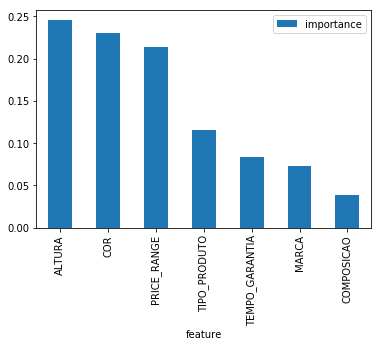

In [377]:
#plotando a importância das variáveis
importances.plot.bar()

## 4) Conclusão


Após essa análise, é possível observar com certa acurácia quais são as variáveis mais importantes para definição do interesse em algum produto.


Para enriquecer esses resultados, poderíamos incluir as variáveis excluídas e/ou adicionar novas features, para conseguir melhorar o desempenho da previsão.



Além disso, se houvesse mais tempo, gostaria de melhorar a parte de dataviz, pois se isso fosse apresentado para alguém que não tem tanto conhecimento de ciência de dados, isso faria toda a diferença.



Obrigada! Espero que tenham gostado XD

Abs, Thalita

![alt text](https://media.giphy.com/media/xT77XZrTKOxycjaYvK/giphy.gif)